# An example how to systematically run VQE boosting by DBQA


[Qibo 0.2.9|INFO|2024-06-21 13:52:32]: Using numpy backend on /CPU:0
INFO:qibo.config:Using numpy backend on /CPU:0


1
Initilizing gci:

In the VQE numpy
The gci mode is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field as the oracle.

VQE energy is -14.8569 and the DBQA yields -14.8569. 
The target energy is -15.27613 which means the difference is for VQE 0.41923 and of the DBQA 0.41923 which can be compared to the spectral gap 1.08767.
The relative difference is for VQE 2.74436% and for DBQA 2.74436%.The energetic fidelity witness for the ground state for the
VQE is 0.61456 
and DBQA 0.61456
The true fidelity is 0.00229 (see boostvqe issue https://github.com/qiboteam/boostvqe/issues/51 why this value seems wrong)
and DBQA 0.61456
The boosting circuit used 0 CNOT gates coming from compiled XXZ evolution and 70 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 0.0 and n_CZ/n_qubits = 7.0


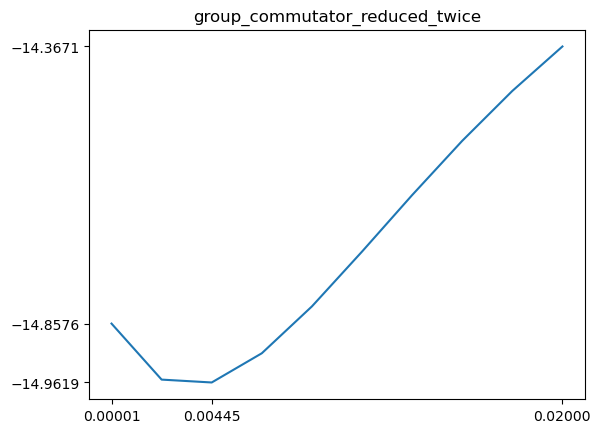

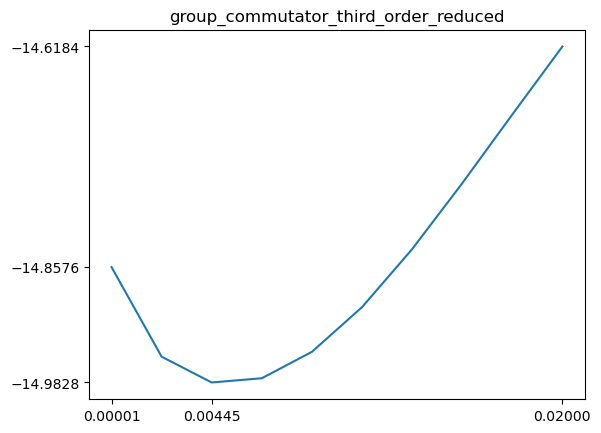

Executing gci step:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.004452222222222222.
--- the report after execution:

VQE energy is -14.8569 and the DBQA yields -14.98282. 
The target energy is -15.27613 which means the difference is for VQE 0.41923 and of the DBQA 0.29331 which can be compared to the spectral gap 1.08767.
The relative difference is for VQE 2.74436% and for DBQA 1.92006%.The energetic fidelity witness for the ground state for the
VQE is 0.61456 
and DBQA 0.73033
The true fidelity is 0.00245 (see boostvqe issue https://github.com/qiboteam/boostvqe/issues/51 why this value seems wrong)
and DBQA 0.73033
The boosting circuit used 90 CNOT gates coming from compiled XXZ evolution and 350 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 9.0 and n_CZ/n_qubits = 35.0
==== the execution report ends here


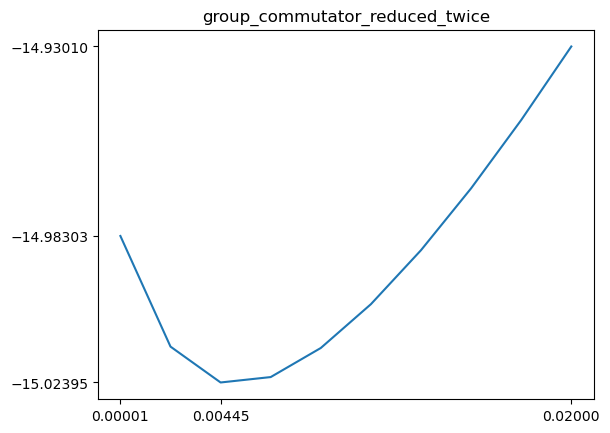

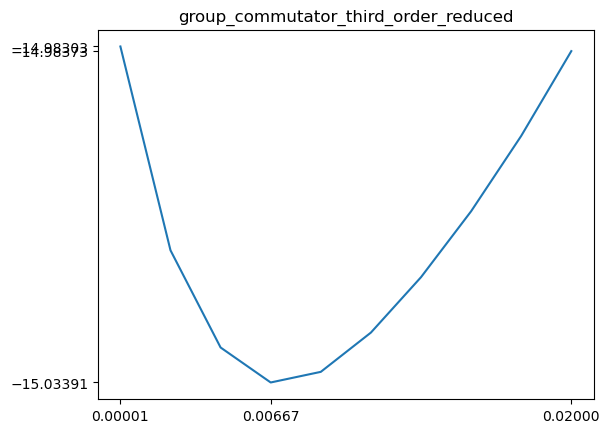

Executing gci step:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.006673333333333333.
--- the report after execution:

VQE energy is -14.8569 and the DBQA yields -15.03391. 
The target energy is -15.27613 which means the difference is for VQE 0.41923 and of the DBQA 0.24222 which can be compared to the spectral gap 1.08767.
The relative difference is for VQE 2.74436% and for DBQA 1.58563%.The energetic fidelity witness for the ground state for the
VQE is 0.61456 
and DBQA 0.7773
The true fidelity is 0.00256 (see boostvqe issue https://github.com/qiboteam/boostvqe/issues/51 why this value seems wrong)
and DBQA 0.7773
The boosting circuit used 540 CNOT gates coming from compiled XXZ evolution and 1750 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 54.0 and n_CZ/n_qubits = 175.0
==== the execution report ends here


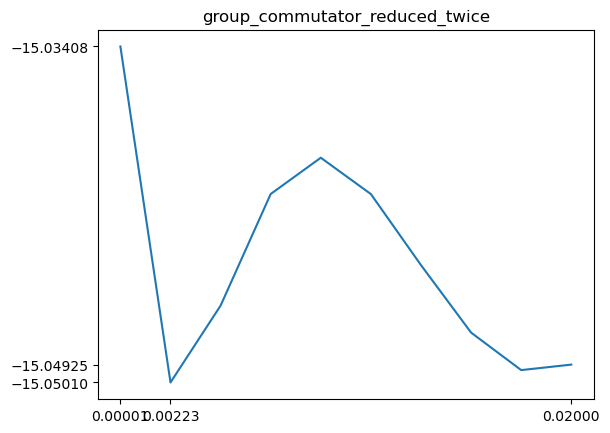

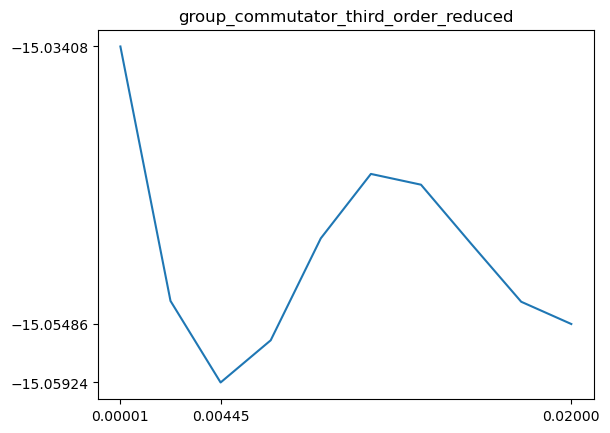

Executing gci step:

The selected data is DoubleBracketRotationType.group_commutator_third_order_reduced rotation with B Field for the duration s = 0.004452222222222222.
--- the report after execution:

VQE energy is -14.8569 and the DBQA yields -15.05924. 
The target energy is -15.27613 which means the difference is for VQE 0.41923 and of the DBQA 0.21689 which can be compared to the spectral gap 1.08767.
The relative difference is for VQE 2.74436% and for DBQA 1.41979%.The energetic fidelity witness for the ground state for the
VQE is 0.61456 
and DBQA 0.80059
The true fidelity is 0.0027 (see boostvqe issue https://github.com/qiboteam/boostvqe/issues/51 why this value seems wrong)
and DBQA 0.80059
The boosting circuit used 2790 CNOT gates coming from compiled XXZ evolution and 8750 CZ gates from VQE.
For 10 qubits this gives n_CNOT/n_qubits = 279.0 and n_CZ/n_qubits = 875.0
==== the execution report ends here


In [2]:
from boostvqe.utils import *
    
gci_eval_counter = 1
dict_params = []
for nqubits in [10]:
    for nlayers in [7]:
        for seed in [42]:
            for target_epoch in [2000]:
                for eo_d in get_eo_d_initializations(nqubits)[0:1]:
                    mode_dbr_list =[#DoubleBracketRotationType.group_commutator_reduced,
                            #DoubleBracketRotationType.group_commutator_mix_twice,
                            DoubleBracketRotationType.group_commutator_reduced_twice,
                            DoubleBracketRotationType.group_commutator_third_order_reduced,
                            #DoubleBracketRotationType.group_commutator_third_order_reduced_twice
                            ]
                    dict_params.append( dict(
                        nqubits=nqubits,
                        nlayers=nlayers,
                        seed = seed,
                        target_epoch = target_epoch,
                        nmb_gci_steps = 3,
                        nmb_gd_epochs = 1,
                        eo_d = eo_d,
                        mode_dbr_list = mode_dbr_list,
                        please_be_verbose = True,
                        please_be_visual = True
                    ))
                    
                    print(gci_eval_counter)
                    gci_eval_counter +=1
                    execute_gci_boost( **dict_params[-1] )
                    
                        
                    
